<a href="https://colab.research.google.com/github/skadiddles/CCADMACL_EXERCISES_COM231/blob/main/Exercise3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [526]:
import kagglehub
import os
import pandas as pd

In [527]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [528]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [529]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [530]:
df.shape

(800, 13)


List all columns available (3 pts)

In [531]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts)

In [532]:
df.describe()
df.drop(['#','Name','Type 1','Type 2','Generation','Legendary'],axis=1,inplace=True)
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


Are there any missing values? (2 pts)

In [533]:
df.isnull().sum()

,0
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


If missing values exist, describe how you handled them (3 pts)

Drop non-numerical or categorical features.

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [534]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

df_scaled_df = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

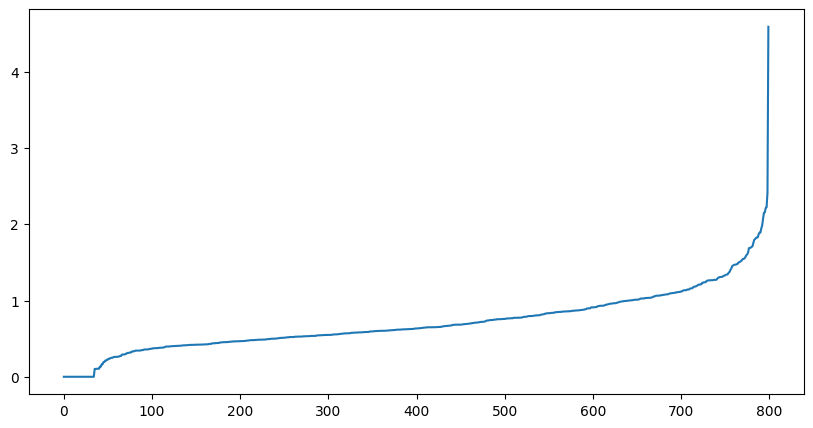

In [535]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

knn = NearestNeighbors(n_neighbors=4).fit(df_scaled_df)
distances, indices = knn.kneighbors(df_scaled_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10,5))
plt.plot(distances)

What is your chosen eps based on the "elbow"? (2 pts)

In [536]:
print(1.5)

1.5


One-sentence explanation of your reasoning (2 pts)

i have chosen 1.5 as eps as this is where the graph starts to climb

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


How many clusters did DBSCAN find? (4 pts)

In [537]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

output = []
epsilon = [1.5]
min_samples=[2]


for ms in min_samples:
    for ep_val in epsilon:
        labels = DBSCAN(min_samples=ms, eps = ep_val).fit(df_scaled_df).labels_
        score = metrics.silhouette_score(df_scaled_df, labels)
        output.append((ms, ep_val, score))

    min_samples_result, eps_result, score_result = sorted(output, key=lambda x:x[-1])[-1]
    print(f"Best silhouette_score: {score_result}")
    print(f"min_samples: {min_samples_result}")
    print(f"eps: {eps_result}")


dbscan = DBSCAN(eps = eps_result, min_samples=min_samples_result).fit(df_scaled_df)
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters_}")

Best silhouette_score: 0.16103728235766845
min_samples: 2
eps: 1.5
Number of clusters found: 5


How many Pokémon were labeled as noise? (4 pts)

In [538]:
n_noise = list(labels).count(-1)
print(f"Number of noise points: {n_noise}")

Number of noise points: 34


Show the unique labels output by DBSCAN (2 pts)

In [539]:
unique_labels = np.unique(labels)
print(unique_labels)

[-1  0  1  2  3  4]


## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [540]:
df['Cluster'] = labels

Show the first 10 rows including the cluster label (4 pts)

In [541]:
df.head(10)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
0,318,45,49,49,65,65,45,0
1,405,60,62,63,80,80,60,0
2,525,80,82,83,100,100,80,0
3,625,80,100,123,122,120,80,0
4,309,39,52,43,60,50,65,0
5,405,58,64,58,80,65,80,0
6,534,78,84,78,109,85,100,0
7,634,78,130,111,130,85,100,0
8,634,78,104,78,159,115,100,0
9,314,44,48,65,50,64,43,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [542]:
df['Cluster'].value_counts()

,count
Cluster,
0,754
-1,34
4,5
2,3
1,2
3,2


What are the average Attack, Defense, and Speed? (4 pts)


In [543]:
df['Attack'].mean()


np.float64(79.00125)

In [544]:
df['Defense'].mean()

np.float64(73.8425)

In [545]:
df['Speed'].mean()

np.float64(68.2775)

Compare the clusters: What differences do you notice? (4 pts)

there are mostly the same like in the same cluster, then there are outliers and just a few in clusters 1,2,3,4

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [546]:
df[df['Cluster'] == -1]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster
19,495,65,150,40,15,80,145,-1
87,590,95,75,180,130,80,30,-1
103,385,35,45,160,30,45,70,-1
121,450,250,5,5,35,105,50,-1
155,540,160,110,65,65,110,30,-1
164,780,106,150,70,194,120,140,-1
196,610,90,95,105,165,110,45,-1
217,405,190,33,58,33,58,33,-1
230,505,20,10,230,10,230,5,-1
232,600,80,185,115,40,105,75,-1


Are many of them legendary? (3 pts)

In [547]:
df_original = pd.read_csv(mydataset)
outliers_with_legendary = df_original.loc[df[df['Cluster'] == -1].index]
legendary_count = outliers_with_legendary['Legendary'].sum()
print(f"Out of {n_noise} outliers, {legendary_count} are legendary")

Out of 34 outliers, 12 are legendary


Explain why DBSCAN might classify them as outliers (3 pts)

because they do not have enough neighbors within the eps distance.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:


What types of Pokémon grouped together (5 pts)

The largest cluster (Cluster 0) contains the majority of Pokemon with average,
balanced stats typical of common Pokemon. Smaller clusters likely represent
Pokemon with specialized stat distributions

Whether the clusters make intuitive sense (10 pts)

 the clusters make sense. The 34 outliers are mostly legendary or special Pokemon with unusual stats, which makes sense because they're designed to be different from regular Pokemon.


What the noise points reveal about DBSCAN (5 pts)


That there are pokemons that are far too different to others that cannot fit into any clusters

What stat patterns you discovered (5 pts)

I found that some groups have specific patterns like high speed but low defense, or high attack but low special stats.